In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

### 1. С помощью библиотеки OpenCV считайте изображение:

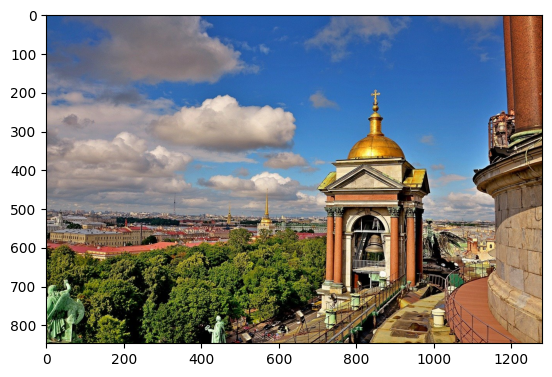

In [2]:
img_original = cv2.imread('./peter-3794597_1280.jpg') 
# By default, OpenCV reads images in BGR format (Blue, Green, Red) instead of RGB. So, the loaded image is in BGR format.
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.imshow(img_original)
plt.show()

### 2. Определите параметры изображения.

In [3]:
print("высота:", img_original.shape[0], "ширина:", img_original.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_original))

высота: 847 ширина: 1280
среднее значение интенсивности пикселя: 112.78574226436443


### 3. Выполните преобразование экспозиции.

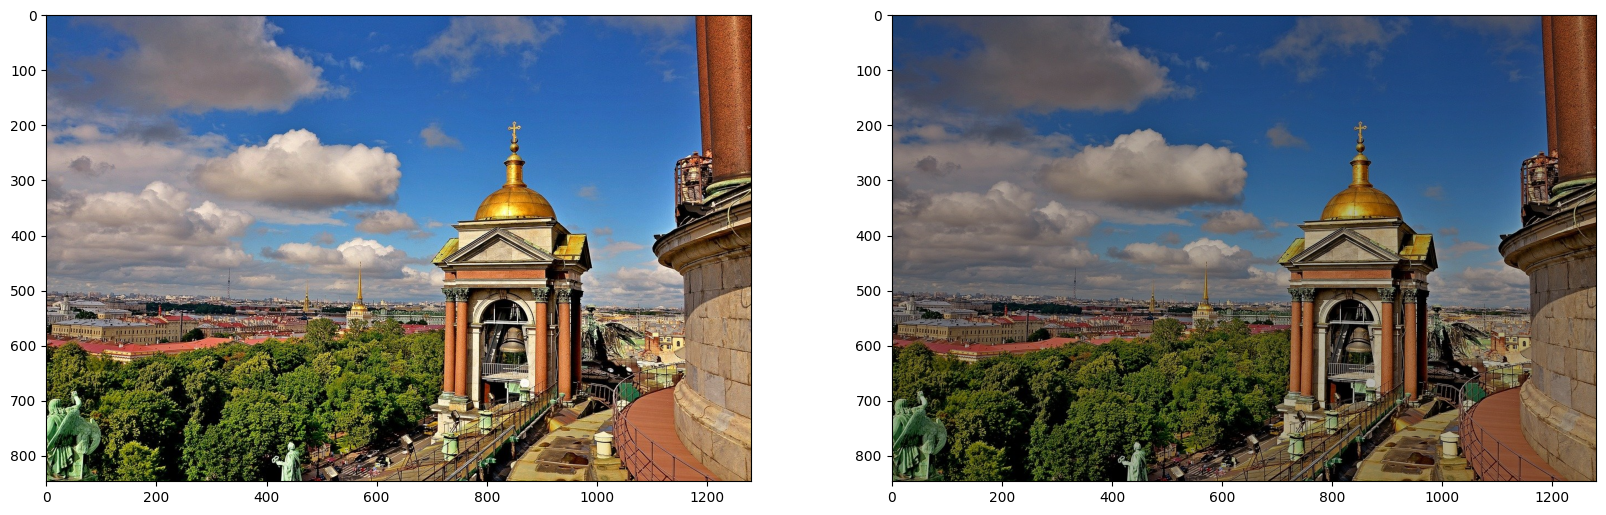

In [4]:
exposition = -0.46
def exposure(image, p):
    return image.copy() * (2 ** p)

#Преобразование
img_result_lib = exposure(img_original, exposition)
#Сохранение в файл
cv2.imwrite("img_result_lib.png", img_result_lib)
#Чтение из файла
img_result_lib = cv2.imread("img_result_lib.png")


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result_lib)

In [5]:
print("Среднее значение интенсивности пикселя изображения, измененного библиотекой:", np.mean(img_result_lib))

Среднее значение интенсивности пикселя изображения, измененного библиотекой: 82.00073820592287


### 4. Выполните преобразование контрастности.

Обратите внимание, что при применении преобразования контрастности предполагается, что значения интенсивностей пикселей каналов R, G, B находятся в диапазоне $[0,1]$. Чтобы этого добиться (ведь изначально они находятся в диапазоне $[0,255] \cap \mathbb{Z}$), достаточно разделить все интенсивности в матричном представлении изображения на $255$. 

In [6]:
image_result = img_original.copy() / 255
image_result[50][50]

array([0.18431373, 0.35686275, 0.61176471])

 При этом, если после преобразований $I_{\text {out }}[x, y]>1$, то нужно считать, что $I_{\text {out }}[x, y]=1$. Аналогично, если $I_{\text {out }}[x, y]<0$, то нужно считать, что $I_{\text {out }}[x, y]=0$. Далее следует произвести обратное масштабирование значений интенсивностей каналов $\mathrm{R}, \mathrm{G}, \mathrm{B}$ в диапазон $[0,255] \cap \mathbb{Z}$ с огруглением до целых по правилам математики.


\begin{equation}
\begin{aligned}
& Contrast\\
& I_{\text {out }}[x, y]= \begin{cases}\left(I_{\text {in }}[x, y]-0.5\right) \cdot \frac{1}{1-p}, & \text { if } p>0 \\
\left(I_{\text {in }}[x, y]-0.5\right) \cdot(1-p), & \text { otherwise; }\end{cases} \\
& p \in[-1,1]
\end{aligned}
\end{equation}

In [21]:
contrast_arg =-0.46

In [22]:
def contrast(image, p):
    if(p > 0):
        img_result = (image.copy() - 0.5) * (1 / (1 - p))
    else:
        img_result = (image.copy() - 0.5) * (1 - p)
    for i in range(img_result.shape[0]):
        for j in range(img_result.shape[1]):
            for k in range(img_result.shape[2]):
                if(img_result[i][j][k] > 1):
                    img_result[i][j][k] = 1
                if(img_result[i][j][k] < 0):
                    img_result[i][j][k] = 0
    img_result = img_result * 255
    for i in range(0, img_result.shape[0]):
      for j in range(0, img_result.shape[1]):
        img_result[i,j] = (round(img_result[i,j][0],0),round(img_result[i,j][1],0),round(img_result[i,j][2],0))
    return img_result

img_result = contrast(image_result, contrast_arg)
img_result[50][50]
        

array([ 0.,  0., 42.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


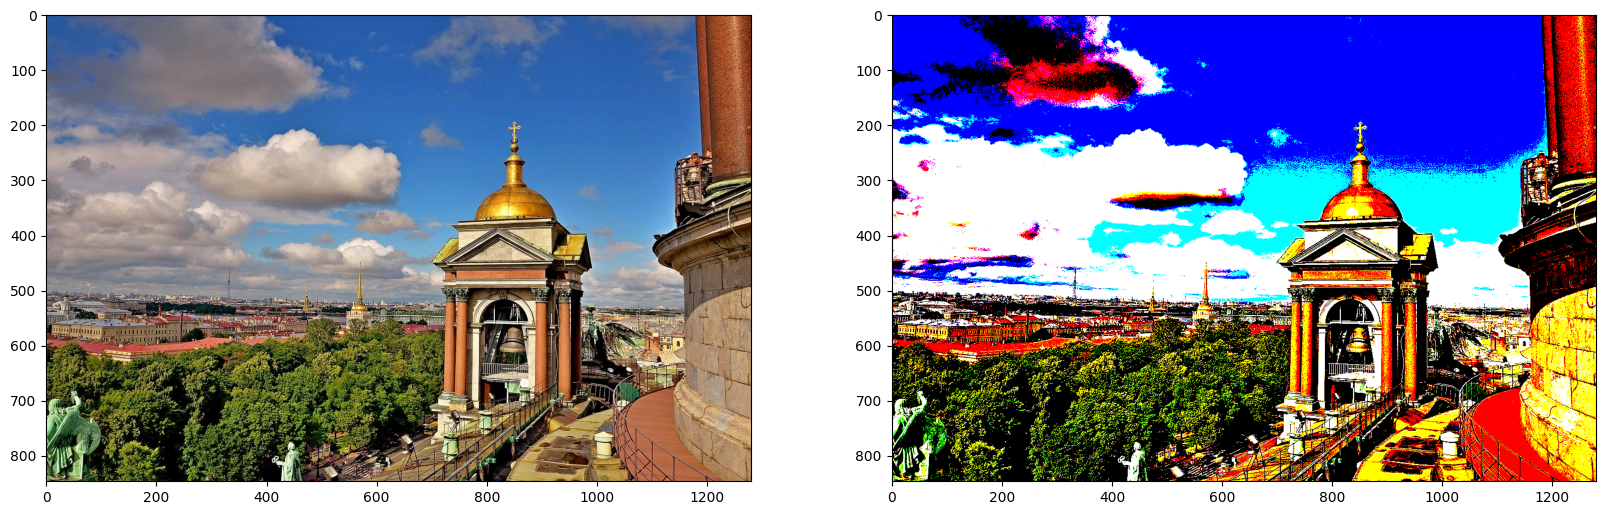

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result)

In [25]:
print("Среднее значение интенсивности пикселя изображения:", np.mean(img_result))

Среднее значение интенсивности пикселя изображения: 26.59226959120425
